## ❎ TelecomX_parte2

#🛠️ Preparação dos Dados

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/SousaPHP/Telecom-X-Parte-2-Challenge-Data-Science-Alura/refs/heads/main/dataset/dados_tratados.csv')
df.head()

,ID_Cliente,Abandono,Genero_Cliente,Eh_Idoso,Tem_Parceiro,Tem_Dependentes,Meses_Cliente,Assinatura_Tem_Servico_Telefone,Assinatura_Multiplas_Linhas,Tipo_Servico_Internet,...,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tecnico,Assinatura_Streaming_TV,Assinatura_Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Mensalidade,Total_Cobrado,Custo_Diario
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [2]:
print(df.columns)
df.info()

Index(['ID_Cliente', 'Abandono', 'Genero_Cliente', 'Eh_Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Meses_Cliente', 'Assinatura_Tem_Servico_Telefone',
       'Assinatura_Multiplas_Linhas', 'Tipo_Servico_Internet',
       'Assinatura_Seguranca_Online', 'Assinatura_Backup_Online',
       'Assinatura_Protecao_Dispositivo', 'Assinatura_Suporte_Tecnico',
       'Assinatura_Streaming_TV', 'Assinatura_Streaming_Filmes',
       'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Mensalidade',
       'Total_Cobrado', 'Custo_Diario'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Cliente                       7043 non-null   object 
 1   Abandono                         7043 non-null   bool   
 2   Genero_Cliente                   7043 non-null   object 
 3   Eh_Idoso       

## Remoção de Colunas Irrelevantes
As colunas ID_Cliente, Genero_Cliente, Tem_Parceiro e Custo_Diario seram removidas essa decisão foi tomada com base em análises anteriores realizadas sobre esta mesma base de dados [Telecom-X Challenge - Data Science Alura.](https://github.com/SousaPHP/Telecom-X-Challenge-Data-Science-Alura-)

A remoção visa reduzir o ruído nos dados e melhorar a performance e interpretabilidade dos modelos preditivos.

In [3]:
colunas_para_remover = ['ID_Cliente', 'Genero_Cliente', 'Tem_Parceiro', 'Custo_Diario']
df = df.drop(columns=colunas_para_remover)
df.head()

,Abandono,Eh_Idoso,Tem_Dependentes,Meses_Cliente,Assinatura_Tem_Servico_Telefone,Assinatura_Multiplas_Linhas,Tipo_Servico_Internet,Assinatura_Seguranca_Online,Assinatura_Backup_Online,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tecnico,Assinatura_Streaming_TV,Assinatura_Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Metodo_Pagamento,Mensalidade,Total_Cobrado
0,False,False,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,False,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,True,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,True,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,True,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


## Encoding
Transformando as variáveis categóricas e boleanas(true ou false) em formato numérico(0 ou 1) para torná-las compatíveis com algoritmos de machine learning.

In [4]:
categorical_cols = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
boolean_cols = df_encoded.select_dtypes(include='bool').columns
for col in boolean_cols:
    df_encoded[col] = df_encoded[col].astype(int)

display(df_encoded.head())
df_encoded.info()

,Abandono,Eh_Idoso,Tem_Dependentes,Meses_Cliente,Assinatura_Tem_Servico_Telefone,Assinatura_Multiplas_Linhas,Assinatura_Seguranca_Online,Assinatura_Backup_Online,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tecnico,...,Tipo_Servico_Internet_DSL,Tipo_Servico_Internet_Fiber optic,Tipo_Servico_Internet_No,Tipo_Contrato_Month-to-month,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pagamento_Bank transfer (automatic),Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check
0,0,0,1,9,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,9,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,4,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,13,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
4,1,1,0,3,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Abandono                                    7043 non-null   int64  
 1   Eh_Idoso                                    7043 non-null   int64  
 2   Tem_Dependentes                             7043 non-null   int64  
 3   Meses_Cliente                               7043 non-null   int64  
 4   Assinatura_Tem_Servico_Telefone             7043 non-null   int64  
 5   Assinatura_Multiplas_Linhas                 7043 non-null   int64  
 6   Assinatura_Seguranca_Online                 7043 non-null   int64  
 7   Assinatura_Backup_Online                    7043 non-null   int64  
 8   Assinatura_Protecao_Dispositivo             7043 non-null   int64  
 9   Assinatura_Suporte_Tecnico                  7043 non-null   int64  
 10  Assinatura_S

In [5]:
colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64'])
correlacoes = colunas_numericas.corr()['Abandono'].sort_values(ascending=False)
print(correlacoes.drop('Abandono'))

Tipo_Contrato_Month-to-month                  0.405103
Tipo_Servico_Internet_Fiber optic             0.308020
Metodo_Pagamento_Electronic check             0.301919
Mensalidade                                   0.193356
Fatura_Digital                                0.191825
Eh_Idoso                                      0.150889
Assinatura_Streaming_TV                       0.063228
Assinatura_Streaming_Filmes                   0.061382
Assinatura_Multiplas_Linhas                   0.040102
Assinatura_Tem_Servico_Telefone               0.011942
Assinatura_Protecao_Dispositivo              -0.066160
Assinatura_Backup_Online                     -0.082255
Metodo_Pagamento_Mailed check                -0.091683
Metodo_Pagamento_Bank transfer (automatic)   -0.117937
Tipo_Servico_Internet_DSL                    -0.124214
Metodo_Pagamento_Credit card (automatic)     -0.134302
Tem_Dependentes                              -0.164221
Assinatura_Suporte_Tecnico                   -0.164674
Assinatura

## Verificação da Proporção de Evasão

In [6]:

contagem_classes = df_encoded['Abandono'].value_counts()
proporcao_classes = df_encoded['Abandono'].value_counts(normalize=True) * 100

print("📊 Contagem de clientes:")
print(contagem_classes)

print("\n📉 Proporção de clientes (%):")
print(proporcao_classes.round(2))


📊 Contagem de clientes:
Abandono
0    5174
1    1869
Name: count, dtype: int64

📉 Proporção de clientes (%):
Abandono
0    73.46
1    26.54
Name: proportion, dtype: float64


#🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


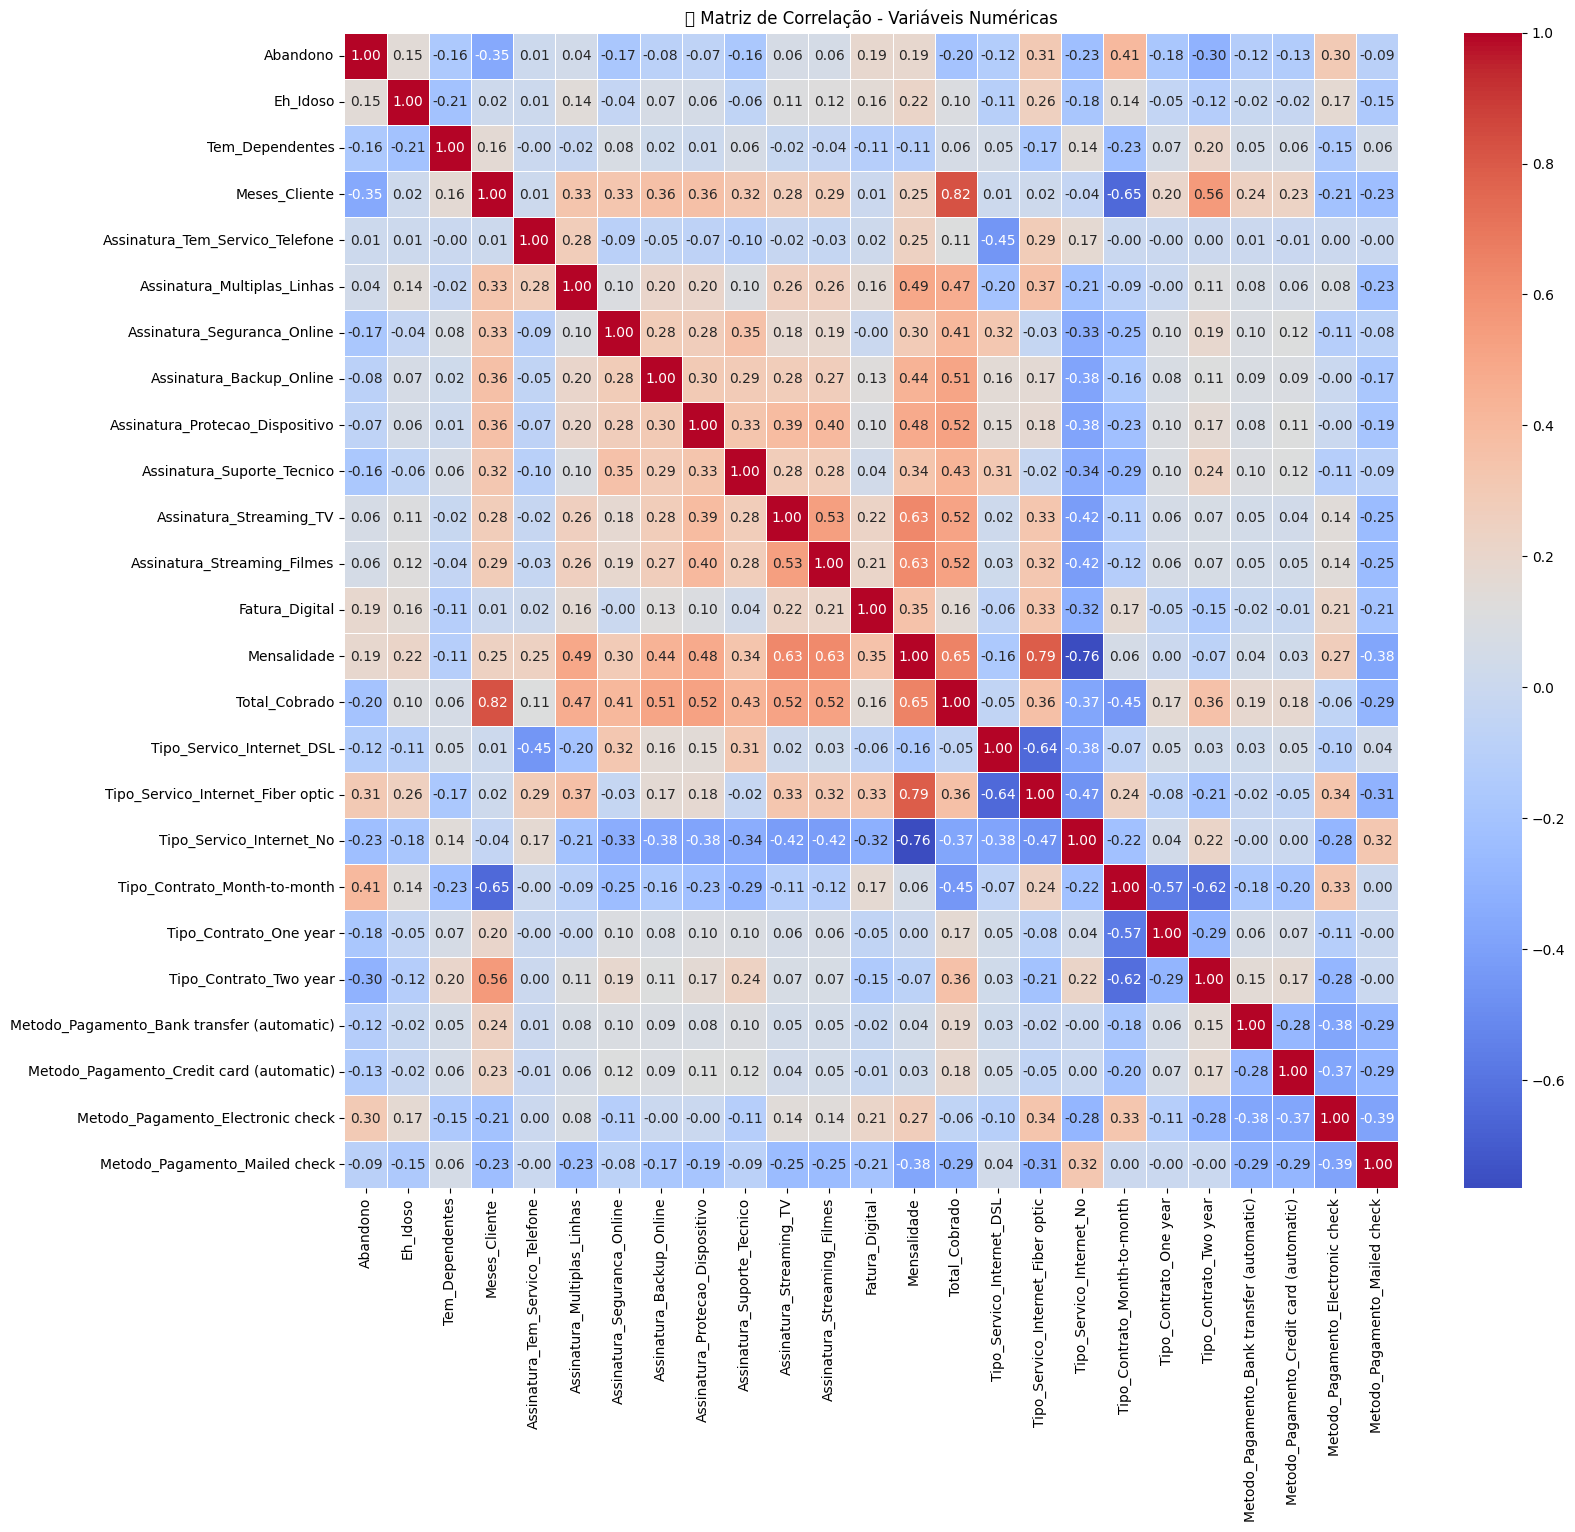

In [7]:
matriz_corr = colunas_numericas.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔍 Matriz de Correlação - Variáveis Numéricas')
plt.show()

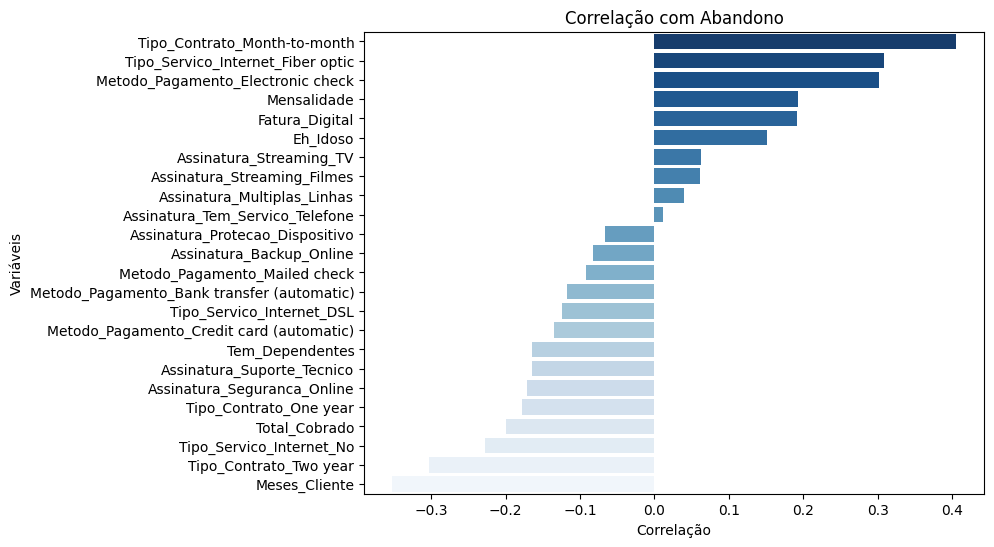

In [8]:
correlacoes = colunas_numericas.corr()['Abandono'].sort_values(ascending=False)
correlacoes = correlacoes.drop('Abandono')

plt.figure(figsize=(8, 6))
sns.barplot(x=correlacoes.values, y=correlacoes.index, hue=correlacoes.index, palette='Blues_r', legend=False)
plt.title('Correlação com Abandono')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.show()


##Análises Direcionadas

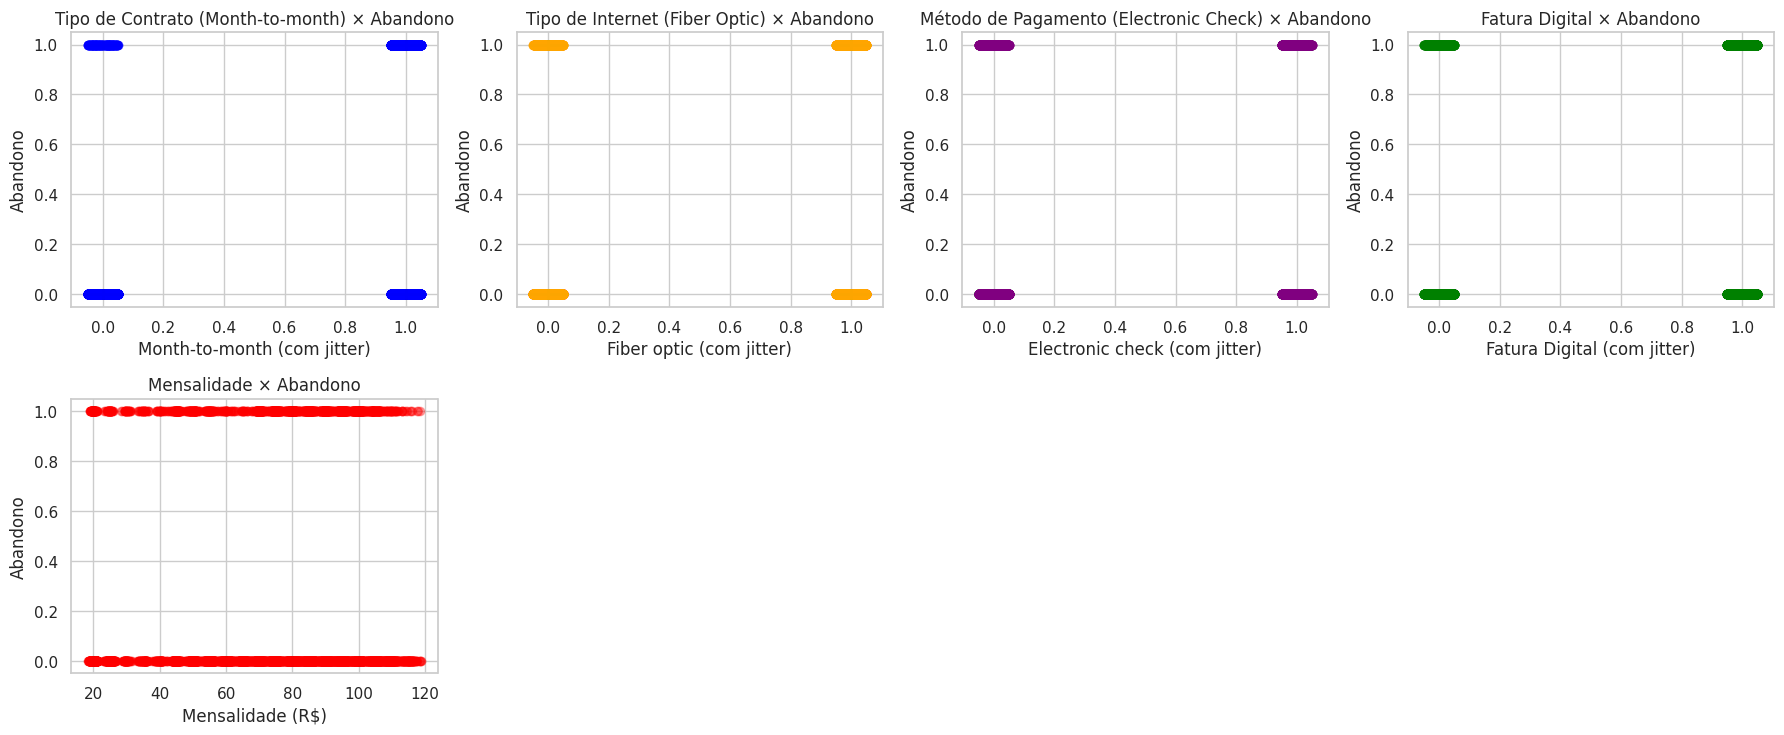

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 18))

# Função para adicionar jitter (espalhamento visual) em variáveis binárias
def add_jitter(series, scale=0.05):
    return series + np.random.uniform(-scale, scale, size=series.shape)

plt.subplot(5, 4, 1)
plt.scatter(add_jitter(df_encoded['Tipo_Contrato_Month-to-month']), df_encoded['Abandono'], alpha=0.3, color='blue')
plt.title('Tipo de Contrato (Month-to-month) × Abandono')
plt.xlabel('Month-to-month (com jitter)')
plt.ylabel('Abandono')

plt.subplot(5, 4, 2)
plt.scatter(add_jitter(df_encoded['Tipo_Servico_Internet_Fiber optic']), df_encoded['Abandono'], alpha=0.3, color='orange')
plt.title('Tipo de Internet (Fiber Optic) × Abandono')
plt.xlabel('Fiber optic (com jitter)')
plt.ylabel('Abandono')

plt.subplot(5, 4, 3)
plt.scatter(add_jitter(df_encoded['Metodo_Pagamento_Electronic check']), df_encoded['Abandono'], alpha=0.3, color='purple')
plt.title('Método de Pagamento (Electronic Check) × Abandono')
plt.xlabel('Electronic check (com jitter)')
plt.ylabel('Abandono')

plt.subplot(5, 4, 4)
plt.scatter(add_jitter(df_encoded['Fatura_Digital']), df_encoded['Abandono'], alpha=0.3, color='green')
plt.title('Fatura Digital × Abandono')
plt.xlabel('Fatura Digital (com jitter)')
plt.ylabel('Abandono')

plt.subplot(5, 4, 5)
plt.scatter(df_encoded['Mensalidade'], df_encoded['Abandono'], alpha=0.3, color='red')
plt.title('Mensalidade × Abandono')
plt.xlabel('Mensalidade (R$)')
plt.ylabel('Abandono')

plt.tight_layout()
plt.show()


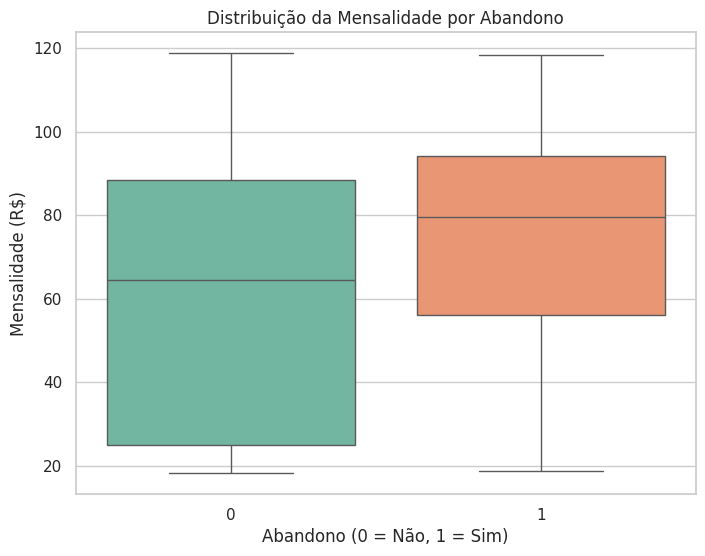

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Abandono', y='Mensalidade', data=df_encoded, hue='Abandono', palette='Set2', legend=False)
plt.title('Distribuição da Mensalidade por Abandono')
plt.xlabel('Abandono (0 = Não, 1 = Sim)')
plt.ylabel('Mensalidade (R$)')
plt.show()


#🤖 Modelagem Preditiva

##Separação de Dados

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Abandono'])
y = df_encoded['Abandono']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste:  {X_test.shape}")

print("\n")

proporcao_treino = y_train.value_counts(normalize=True) * 100
print("📊 Proporção de Churn - Conjunto de Treino:")
print(proporcao_treino.round(2))

print("\n")

proporcao_teste = y_test.value_counts(normalize=True) * 100
print("📊 Proporção de Churn - Conjunto de Teste:")
print(proporcao_teste.round(2))

Tamanho do conjunto de treino: (4930, 24)
Tamanho do conjunto de teste:  (2113, 24)


📊 Proporção de Churn - Conjunto de Treino:
Abandono
0    73.47
1    26.53
Name: proportion, dtype: float64


📊 Proporção de Churn - Conjunto de Teste:
Abandono
0    73.45
1    26.55
Name: proportion, dtype: float64


##Criação de Modelos

Justificativa: A Regressão Logística é um modelo simples, interpretável e muito utilizado como baseline em problemas de classificação binária como o Abandono, mas modelos lineares são sensíveis à escala das variáveis, por isso vamos normalizar os dados com StandardScaler



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Pipeline com normalização + modelo
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# Treinamento
pipeline_logreg.fit(X_train, y_train)

# Previsoes
y_pred_logreg = pipeline_logreg.predict(X_test)

print("📊 Regressão Logística:")
print(classification_report(y_test, y_pred_logreg, target_names=["Não Evadiu", "Evadiu"]))

📊 Regressão Logística:
              precision    recall  f1-score   support

  Não Evadiu       0.85      0.89      0.87      1552
      Evadiu       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



Justificativa:
A Random Forest é um modelo de árvore que não exige normalização, pois seu funcionamento é baseado em divisões sucessivas dos dados, não em distância ou coeficientes lineares, ela lida bem com dados desequilibrados, variáveis categóricas codificadas, e fornece importância das variáveis automaticamente, por isso escolhi ela.

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de floresta aleatória
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Treinamento
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

print("🌳 Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=["Não Evadiu", "Evadiu"]))

🌳 Random Forest:
              precision    recall  f1-score   support

  Não Evadiu       0.83      0.88      0.86      1552
      Evadiu       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [14]:
#Teste
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Pipeline com normalização + pesos balanceados
pipeline_logreg_bal = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42))
])

# Treinamento
pipeline_logreg_bal.fit(X_train, y_train)

# Previsão
y_pred_logreg_bal = pipeline_logreg_bal.predict(X_test)

print("📊 Regressão Logística (class_weight='balanced'):")
print(classification_report(y_test, y_pred_logreg_bal, target_names=["Não Evadiu", "Evadiu"]))

from sklearn.ensemble import RandomForestClassifier

rf_model_bal = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
rf_model_bal.fit(X_train, y_train)
y_pred_rf_bal = rf_model_bal.predict(X_test)

print("🌳 Random Forest (class_weight='balanced'):")
print(classification_report(y_test, y_pred_rf_bal, target_names=["Não Evadiu", "Evadiu"]))


📊 Regressão Logística (class_weight='balanced'):
              precision    recall  f1-score   support

  Não Evadiu       0.91      0.72      0.80      1552
      Evadiu       0.50      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113

🌳 Random Forest (class_weight='balanced'):
              precision    recall  f1-score   support

  Não Evadiu       0.83      0.88      0.85      1552
      Evadiu       0.60      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



## Avaliação dos Modelos

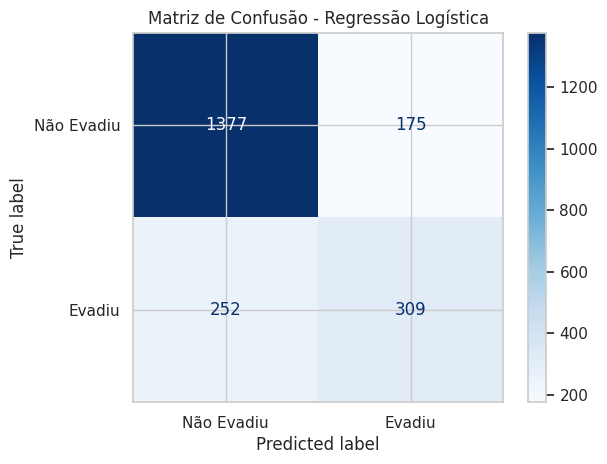

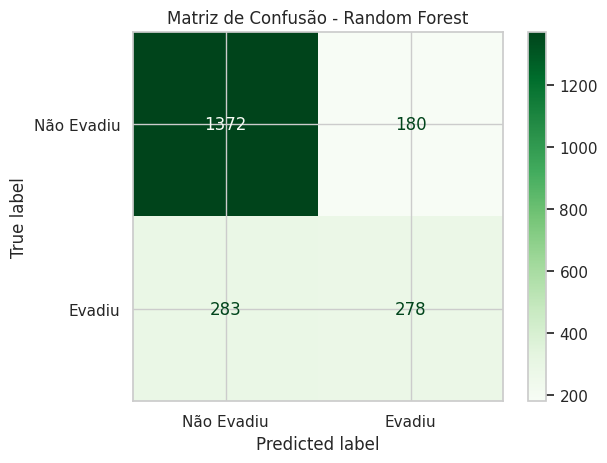

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Regressão Logística
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["Não Evadiu", "Evadiu"])
disp_logreg.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Não Evadiu", "Evadiu"])
disp_rf.plot(cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


Melhor desempenho geral: Regressão Logística
Acurácia ligeiramente maior (80% vs 78%)

F1-score para classe "Evadiu" também melhor (0.59 vs 0.55)

Recall da classe "Evadiu" (que é a mais importante neste caso) foi melhor na regressão logística: 0.55 vs 0.50

Isso significa que a Regressão Logística está fazendo um trabalho um pouco melhor em identificar corretamente os clientes que vão evadir.

Overfitting ou Underfitting?

Regressão Logística: Resultado equilibrado, sem sinais evidentes de overfitting.

Pode estar um pouco underfitting, já que os scores da classe minoritária (Evadiu) estão medianos. Isso é esperado em modelos lineares simples.

Conclusão Estratégica: Ambos os modelos têm desempenho razoável, mas a Regressão Logística se saiu levemente melhor em identificar clientes propensos à evasão.

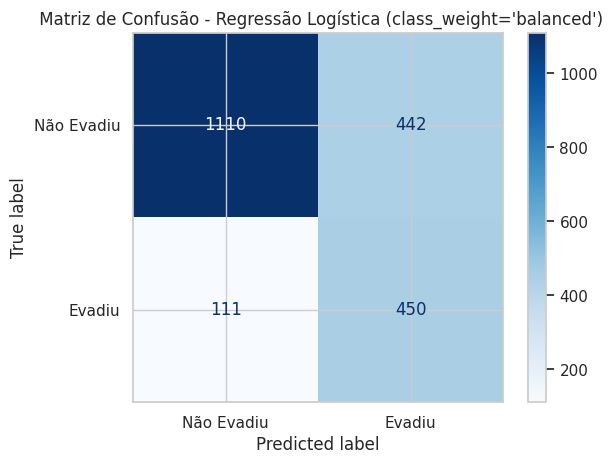

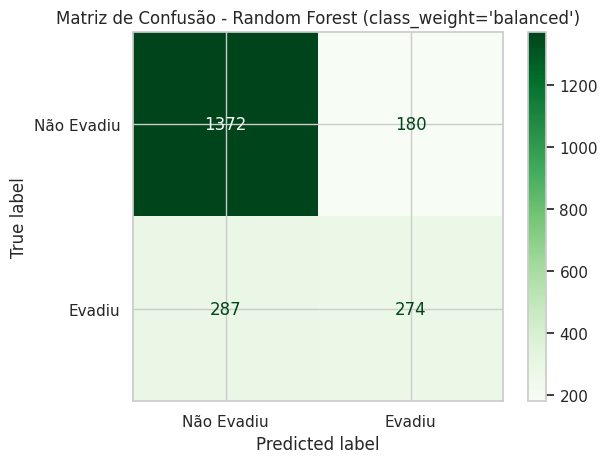

In [16]:
# Teste

# Regressão Logística (class_weight='balanced')
cm_logreg_bal = confusion_matrix(y_test, y_pred_logreg_bal)
disp_logreg_bal = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_bal,
                                         display_labels=["Não Evadiu", "Evadiu"])
disp_logreg_bal.plot(cmap='Blues')
plt.title(" Matriz de Confusão - Regressão Logística (class_weight='balanced')")
plt.show()

# Random Forest (class_weight='balanced')
cm_rf_bal = confusion_matrix(y_test, y_pred_rf_bal)
disp_rf_bal = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bal,
                                     display_labels=["Não Evadiu", "Evadiu"])
disp_rf_bal.plot(cmap='Greens')
plt.title("Matriz de Confusão - Random Forest (class_weight='balanced')")
plt.show()

#📋  Interpretação e Conclusões

##Análise de Importância das Variáveis

📊 Importância das variáveis - Regressão Logística (baseado nos coeficientes):


,Variável,Coef_Logístico,Impacto_Abs
2,Meses_Cliente,-1.426838,1.426838
13,Total_Cobrado,0.671821,0.671821
16,Tipo_Servico_Internet_No,-0.510664,0.510664
15,Tipo_Servico_Internet_Fiber optic,0.475839,0.475839
12,Mensalidade,-0.414964,0.414964
19,Tipo_Contrato_Two year,-0.311471,0.311471
17,Tipo_Contrato_Month-to-month,0.309523,0.309523
11,Fatura_Digital,0.201440,0.201440
8,Assinatura_Suporte_Tecnico,-0.161670,0.161670
9,Assinatura_Streaming_TV,0.160697,0.160697



🌳 Importância das variáveis - Random Forest (baseado em feature_importances_):


,0
Total_Cobrado,0.200421
Mensalidade,0.177184
Meses_Cliente,0.165486
Tipo_Contrato_Month-to-month,0.072975
Tipo_Servico_Internet_Fiber optic,0.037874
Metodo_Pagamento_Electronic check,0.032958
Fatura_Digital,0.027109
Assinatura_Suporte_Tecnico,0.023124
Eh_Idoso,0.022467
Assinatura_Seguranca_Online,0.021784


/tmp/ipython-input-948837571.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias_ordenadas.values, y=importancias_ordenadas.index, palette='viridis')


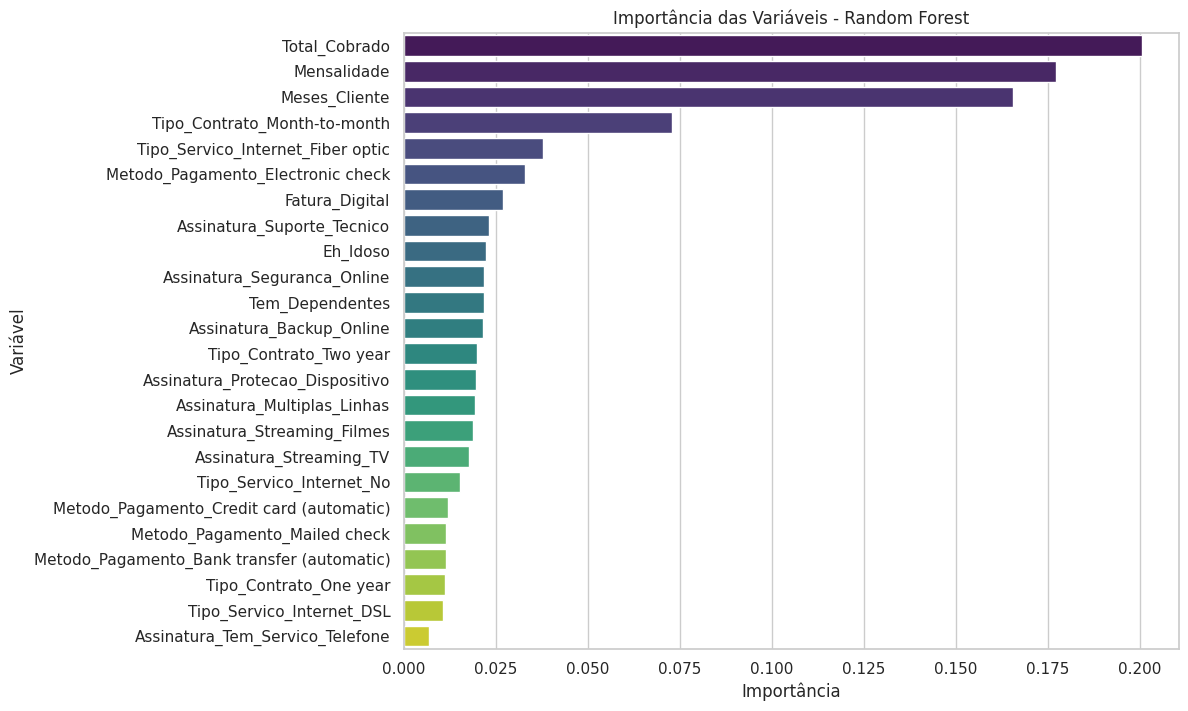

In [17]:
coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coef_Logístico': pipeline_logreg.named_steps['logreg'].coef_[0]
})

# Adicionar uma coluna com o valor absoluto do coeficiente para facilitar a ordenação por magnitude
coeficientes['Impacto_Abs'] = coeficientes['Coef_Logístico'].abs()

# Ordenar por impacto absoluto (do maior para o menor)
coeficientes_ordenados = coeficientes.sort_values(by='Impacto_Abs', ascending=False)

print("📊 Importância das variáveis - Regressão Logística (baseado nos coeficientes):")
display(coeficientes_ordenados)

# Random Forest (baseada na feature_importances_)
# O Random Forest calcula a importância das variáveis com base em como cada variável
# contribui para a redução da impureza (Gini impurity ou entropy) nas árvores.
# Quanto maior o valor, mais importante a variável para o modelo.

importancias = rf_model.feature_importances_

importancias_ordenadas = pd.Series(importancias, index=X_train.columns).sort_values(ascending=False)

print("\n🌳 Importância das variáveis - Random Forest (baseado em feature_importances_):")
display(importancias_ordenadas)

# Opcional: Visualizar a importância das variáveis da Random Forest
plt.figure(figsize=(10, 8))
sns.barplot(x=importancias_ordenadas.values, y=importancias_ordenadas.index, palette='viridis')
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

* A variável Total_Cobrado apresentou baixa importância na previsão de abandono. Isso pode ser explicado pelo fato de que ela é fortemente correlacionada com outras variáveis, como Mensalidade e Meses de Contrato, não acrescentando informação nova ao modelo. Além disso, o abandono parece estar mais relacionado ao valor mensal e ao tempo de permanência do que ao total acumulado pago pelo cliente.

## Conclusão

# Relatório de Análise de Evasão de Clientes

## 1. Principais Pontos Achados

### 1.1 Experiência Inicial
- **Clientes no primeiro mês de contrato** apresentam a maior taxa de abandono.
- Este resultado sugere **possíveis falhas na experiência inicial** do cliente, como problemas na instalação, atendimento ou adaptação ao serviço.
- Estratégias de **onboarding** e suporte ativo nesse período podem reduzir significativamente a evasão.

---

### 1.2 Perfil Demográfico
- **Idosos** e **clientes com dependentes** têm **menor taxa de abandono**.
- Esse grupo tende a buscar estabilidade e apresenta maior fidelidade.
- Estratégias de retenção podem priorizar outros segmentos com maior risco.

---

### 1.3 Tempo de Permanência
- Quanto **maior o tempo de permanência**, **menor a chance de abandono**.
- Após o **primeiro ano**, o risco de evasão cai consideravelmente.
- Isso reforça a importância de estratégias para **garantir que o cliente permaneça além dos primeiros meses**.

---

### 1.4 Variáveis Financeiras
- **Mensalidade**, **Total Cobrado** e **Custo Diário** apresentam **pouca variação** entre clientes que abandonam e os que permanecem.
- **Conclusão:** o **preço por si só** não é o principal motivador de abandono.

---

### 1.5 Tipo de Contrato
- **Contrato Mensal** → **maior taxa de abandono**.
- **Contratos de longo prazo (1 ou 2 anos)** → **maior retenção**, especialmente **2 anos**.
- A flexibilidade do contrato mensal facilita a saída, enquanto contratos longos incentivam a fidelidade.

---

### 1.6 Forma de Pagamento
- **Pagamentos automáticos** (Transferência Bancária Automática, Cartão de Crédito) → **menor evasão**.
- **Pagamentos manuais** (Boleto, Cheque Eletrônico) → **maior evasão**.
- A automação de pagamentos reduz a chance de cancelamentos por esquecimento ou dificuldade no pagamento.

---

## 2. Conclusão Geral
A evasão de clientes está fortemente ligada à **fase inicial do relacionamento**, ao **tipo de contrato** e à **forma de pagamento**.  
O preço, isoladamente, **não é um fator determinante**, mas o **Total Cobrado** baixo entre clientes que abandonam sugere cancelamentos precoces.  
Focar em **melhorar a experiência no primeiro mês**, incentivar **contratos de longo prazo** e promover **pagamentos automáticos** pode reduzir significativamente a taxa de abandono.
